# K-means

Đọc ảnh

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, rand_score, homogeneity_score, completeness_score, silhouette_score
from sklearn.preprocessing import LabelEncoder

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images


Xử lý ảnh, đưa kích thước ảnh về 128*128

In [2]:
def preprocess_images(images):
    processed_images = []
    for img in images:
        resized_img = cv2.resize(img, (128, 128))
        flattened_img = resized_img.flatten()
        processed_images.append(flattened_img)
    return np.array(processed_images), images

Chọn tâm của cụm

In [3]:
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]


Phân cụm

In [4]:
def assign_clusters(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for x in X:
        distances = [np.linalg.norm(x - centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(x)
    return clusters

Cập nhật tâm cụm

In [5]:
def update_centroids(clusters):
    return [np.mean(cluster, axis=0) for cluster in clusters]

Kiểm tra sự hội tụ

In [6]:
def has_converged(old_centroids, centroids, tol=1e-4):
    distances = [np.linalg.norm(old - new) for old, new in zip(old_centroids, centroids)]
    return sum(distances) < tol

Thuật toán K-means

In [7]:
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(clusters)
        if has_converged(old_centroids, centroids):
            break
    return clusters, centroids

Trực quan hóa

In [8]:
def display_clusters(original_images, processed_images, clusters):
    for cluster_idx, cluster in enumerate(clusters):
        plt.figure(figsize=(10, 10))
        for i, img in enumerate(cluster):
            if i >= 25:  # Display up to 25 images per cluster
                break
            original_idx = np.where((processed_images == img).all(axis=1))[0][0]
            plt.subplot(5, 5, i + 1)
            plt.imshow(original_images[original_idx], cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Cluster {cluster_idx + 1}')
        plt.show()

Đánh giá độ chính xác

Accuracy: 0.39471285323609845
F1 Score: 0.3912091538211299
Rand Index: 0.5357611002801269
Homogeneity Score: 0.07391488789587186
Completeness Score: 0.0688042467312468
Silhouette Score: 0.08344584627113376


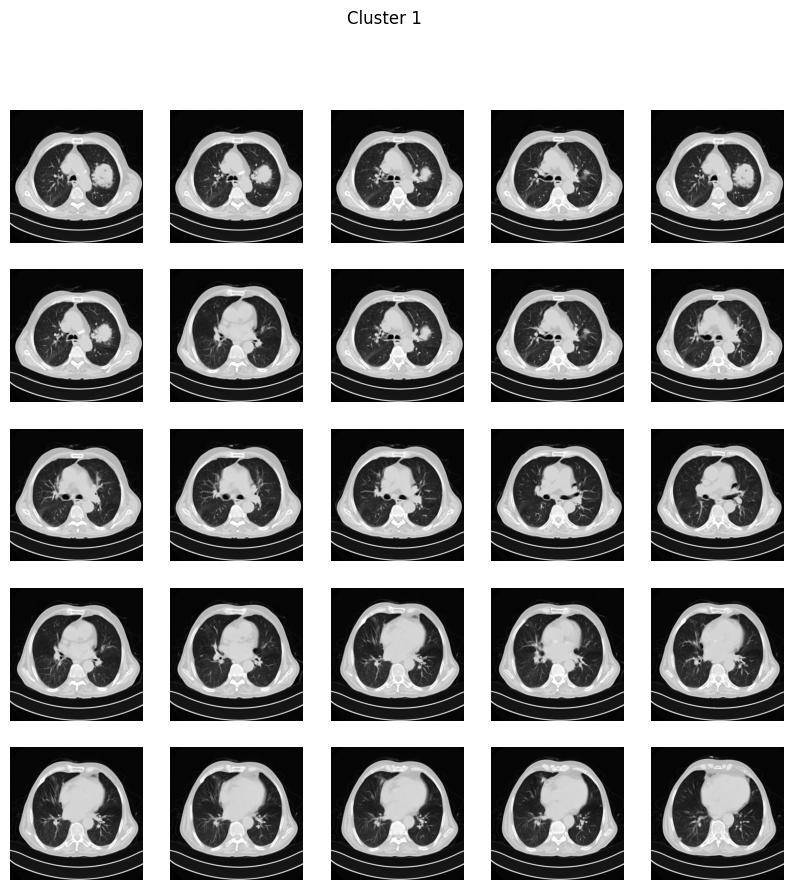

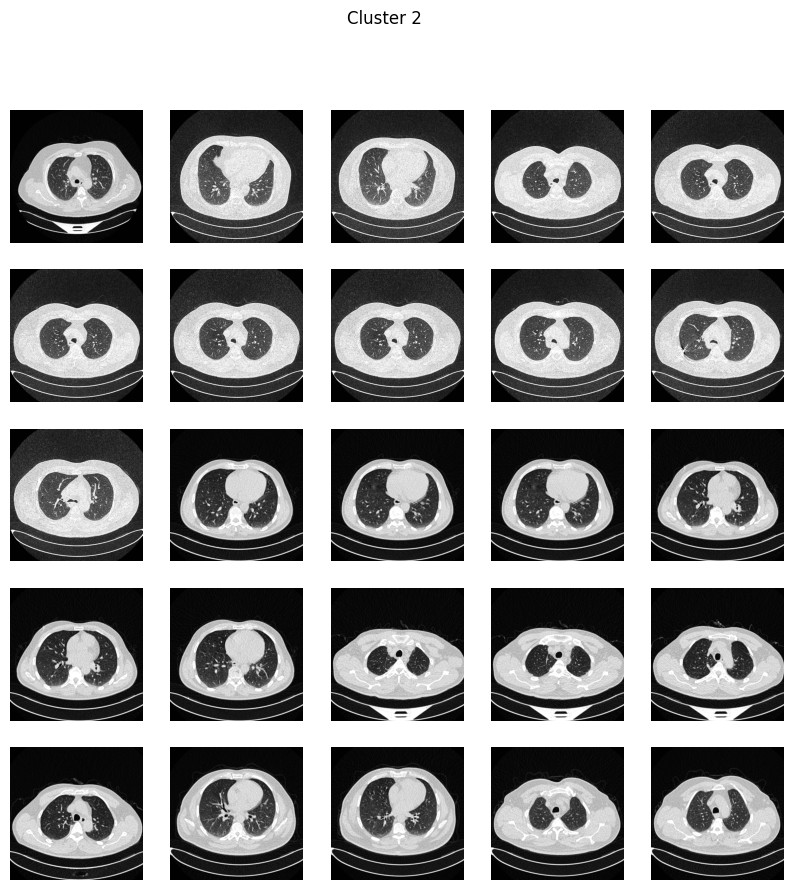

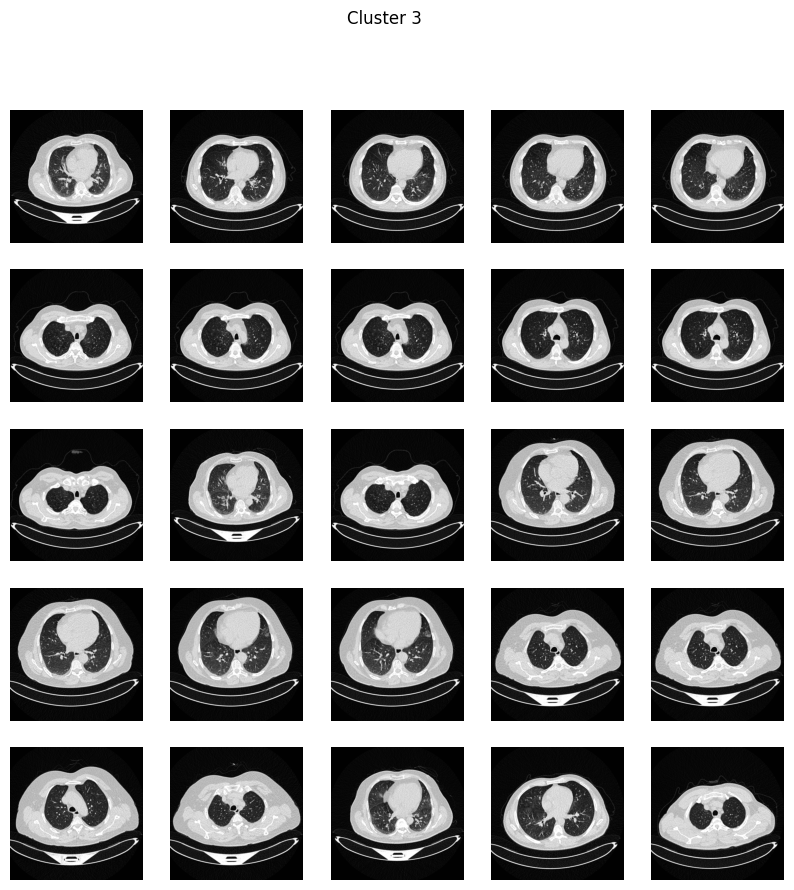

In [9]:
# Load images
benign_cases = load_images_from_folder('D:\\BT\\DM\\lung-cancer\\The IQ-OTHNCCD lung cancer dataset\\The IQ-OTHNCCD lung cancer dataset\\Bengin cases')
malignant_cases = load_images_from_folder('D:\\BT\\DM\\lung-cancer\\The IQ-OTHNCCD lung cancer dataset\\The IQ-OTHNCCD lung cancer dataset\\Malignant cases')
normal_cases = load_images_from_folder('D:\\BT\\DM\\lung-cancer\\The IQ-OTHNCCD lung cancer dataset\\The IQ-OTHNCCD lung cancer dataset\\Normal cases')

# Combine all images and labels
all_images = benign_cases + malignant_cases + normal_cases
processed_images, original_images = preprocess_images(all_images)

# Create true labels
true_labels = ['benign'] * len(benign_cases) + ['malignant'] * len(malignant_cases) + ['normal'] * len(normal_cases)

# Encode labels
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Perform K-means clustering
k = 3
clusters, centroids = kmeans(processed_images, k)

# Map clusters to labels
predicted_labels = np.zeros(len(processed_images))
for cluster_index, cluster in enumerate(clusters):
    for img in cluster:
        original_idx = np.where((processed_images == img).all(axis=1))[0][0]
        predicted_labels[original_idx] = cluster_index

# Evaluate clustering
accuracy = accuracy_score(true_labels_encoded, predicted_labels)
f1 = f1_score(true_labels_encoded, predicted_labels, average='weighted')
rand_index = rand_score(true_labels_encoded, predicted_labels)
homogeneity = homogeneity_score(true_labels_encoded, predicted_labels)
completeness = completeness_score(true_labels_encoded, predicted_labels)
silhouette_avg = silhouette_score(processed_images, predicted_labels)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Rand Index: {rand_index}')
print(f'Homogeneity Score: {homogeneity}')
print(f'Completeness Score: {completeness}')
print(f'Silhouette Score: {silhouette_avg}')

# Display clusters
display_clusters(original_images, processed_images, clusters)

Dùng thư viện scikit-learn

In [10]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(processed_images)
predicted_labels = kmeans.labels_

# Evaluate clustering
accuracy = accuracy_score(true_labels_encoded, predicted_labels)
f1 = f1_score(true_labels_encoded, predicted_labels, average='weighted')
rand_index = rand_score(true_labels_encoded, predicted_labels)
homogeneity = homogeneity_score(true_labels_encoded, predicted_labels)
completeness = completeness_score(true_labels_encoded, predicted_labels)
silhouette_avg = silhouette_score(processed_images, predicted_labels)

print(f'K-means Results:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Rand Index: {rand_index}')
print(f'Homogeneity Score: {homogeneity}')
print(f'Completeness Score: {completeness}')
print(f'Silhouette Score: {silhouette_avg}')




K-means Results:
Accuracy: 0.21513217866909753
F1 Score: 0.20372767524428978
Rand Index: 0.5626825649249113
Homogeneity Score: 0.11159074101351958
Completeness Score: 0.09839719165978612
Silhouette Score: 0.082877026172941


# Hierarchical Clustering

Vẽ cây phân cấp

In [11]:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def plot_dendrogram(Z):
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()


Hiển thị các ảnh theo từng cụm

In [12]:
def display_clusters(original_images, labels):
    num_clusters = len(np.unique(labels))
    for cluster_idx in range(1, num_clusters + 1):
        plt.figure(figsize=(10, 10))
        cluster_images = [original_images[i] for i in range(len(labels)) if labels[i] == cluster_idx]
        for i, img in enumerate(cluster_images[:25]):  # Display up to 25 images per cluster
            plt.subplot(5, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Cluster {cluster_idx}')
        plt.show()

Accuracy: 0.27894257064721967
F1 Score: 0.28832907292625215
Rand Index: 0.5064642122843321
Homogeneity Score: 0.0460627654829806
Completeness Score: 0.0508099082441449
Silhouette Score: 0.10307628188401818


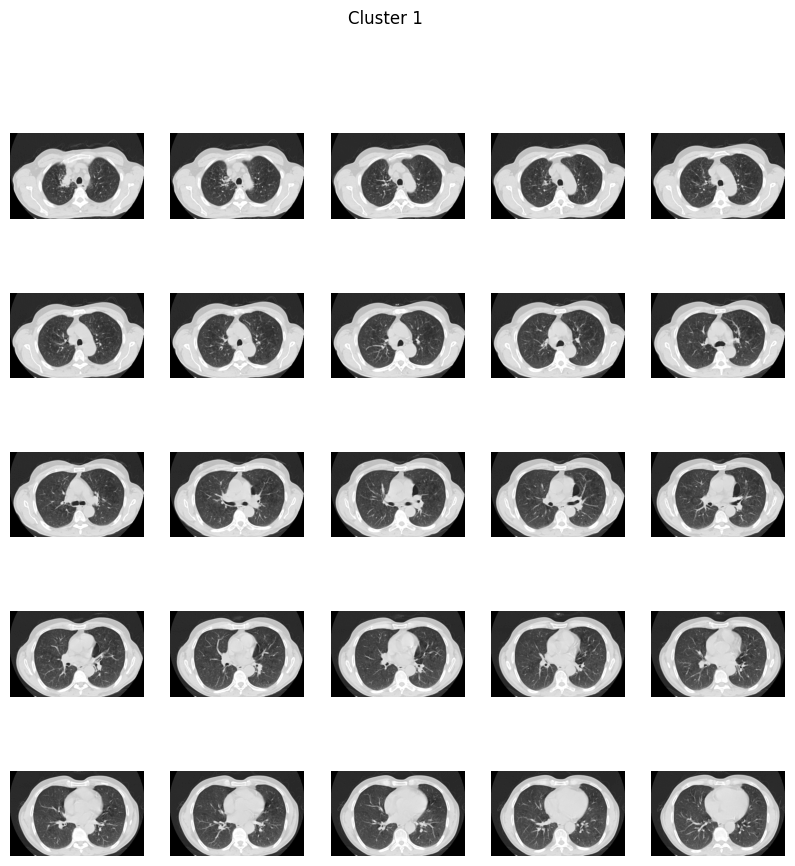

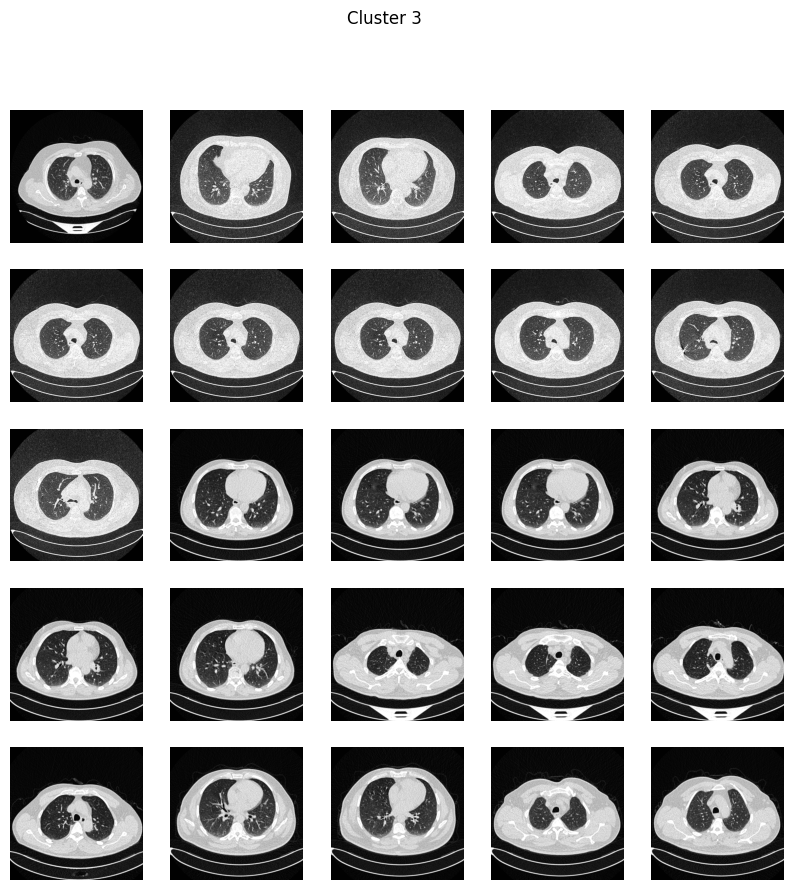

In [13]:
# Perform hierarchical clustering
Z = linkage(processed_images, method='ward')

# Plot the dendrogram
plot_dendrogram(Z)

# Create clusters using a fixed number of clusters
num_clusters = 3  # Specify the desired number of clusters
labels = fcluster(Z, num_clusters, criterion='maxclust')

# Evaluate clustering
accuracy = accuracy_score(true_labels_encoded, labels)
f1 = f1_score(true_labels_encoded, labels, average='weighted')
rand_index = rand_score(true_labels_encoded, labels)
homogeneity = homogeneity_score(true_labels_encoded, labels)
completeness = completeness_score(true_labels_encoded, labels)
silhouette_avg = silhouette_score(processed_images, labels)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Rand Index: {rand_index}')
print(f'Homogeneity Score: {homogeneity}')
print(f'Completeness Score: {completeness}')
print(f'Silhouette Score: {silhouette_avg}')

# Display clusters
display_clusters(original_images, labels)

# DBSCAN Method

Vẽ đồ thị khoảng cách

In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def plot_k_distance(processed_images, k):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(processed_images)
    distances, indices = neighbors_fit.kneighbors(processed_images)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-nearest neighbor distance')
    plt.title(f'k-distance graph for k={k}')
    plt.show()

# Plot k-distance graph
plot_k_distance(processed_images, k=3)


Vẽ các cụm ảnh

In [15]:
def display_clusters(original_images, labels):
    num_clusters = len(np.unique(labels))
    for cluster_idx in range(num_clusters):
        plt.figure(figsize=(10, 10))
        cluster_images = [original_images[i] for i in range(len(labels)) if labels[i] == cluster_idx]
        for i, img in enumerate(cluster_images[:25]):  # Display up to 25 images per cluster
            plt.subplot(5, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Cluster {cluster_idx}')
        plt.show()

Tính khoảng cách Euclidean giữa các điểm

In [16]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

Tìm các điểm trong bán kính

In [17]:
def region_query(data, point_idx, eps):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_idx], data[i]) < eps:
            neighbors.append(i)
    return neighbors

Mở rộng và gán nhạn cho các điểm cùng cụm

In [18]:
def expand_cluster(data, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = region_query(data, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # Noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            elif labels[neighbor_idx] == 0:
                labels[neighbor_idx] = cluster_id
                new_neighbors = region_query(data, neighbor_idx, eps)
                if len(new_neighbors) >= min_samples:
                    neighbors += new_neighbors
            i += 1
        return True

Thực hiện thuật toán DBSCAN

In [19]:
def dbscan(data, eps, min_samples):
    labels = [0] * len(data)
    cluster_id = 0
    for point_idx in range(len(data)):
        if labels[point_idx] == 0:
            if expand_cluster(data, labels, point_idx, cluster_id + 1, eps, min_samples):
                cluster_id += 1
    return labels

Accuracy: 0.4576116681859617
F1 Score: 0.34811128357162996
Rand Index: 0.4710324774268243
Homogeneity Score: 0.043448743254348984
Completeness Score: 0.08053197369652207
Silhouette Score: 0.0848299333733358


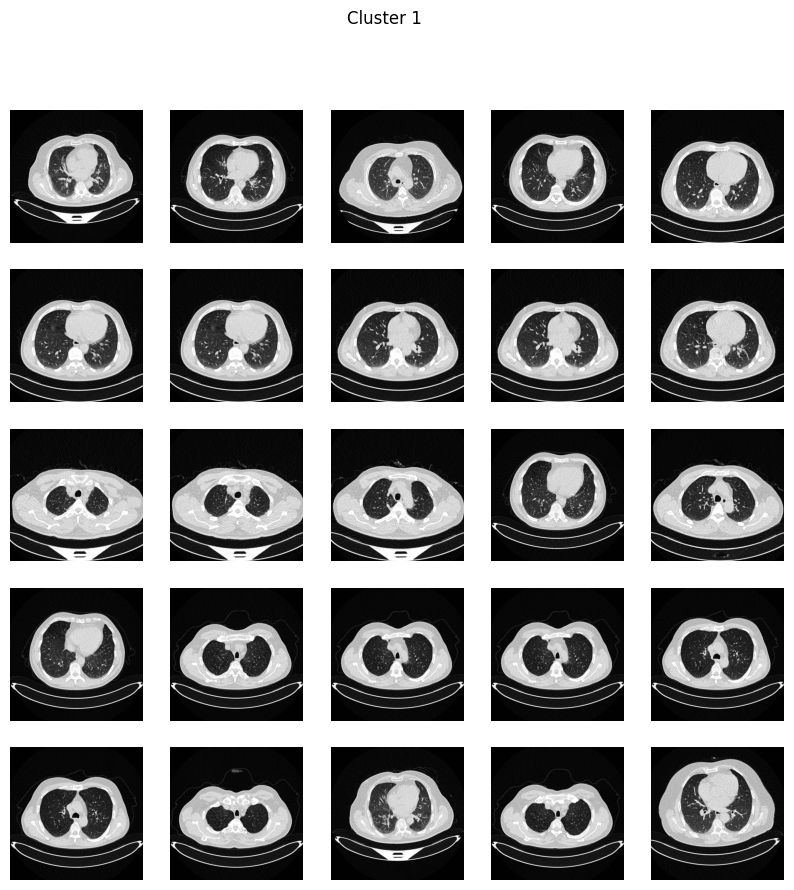

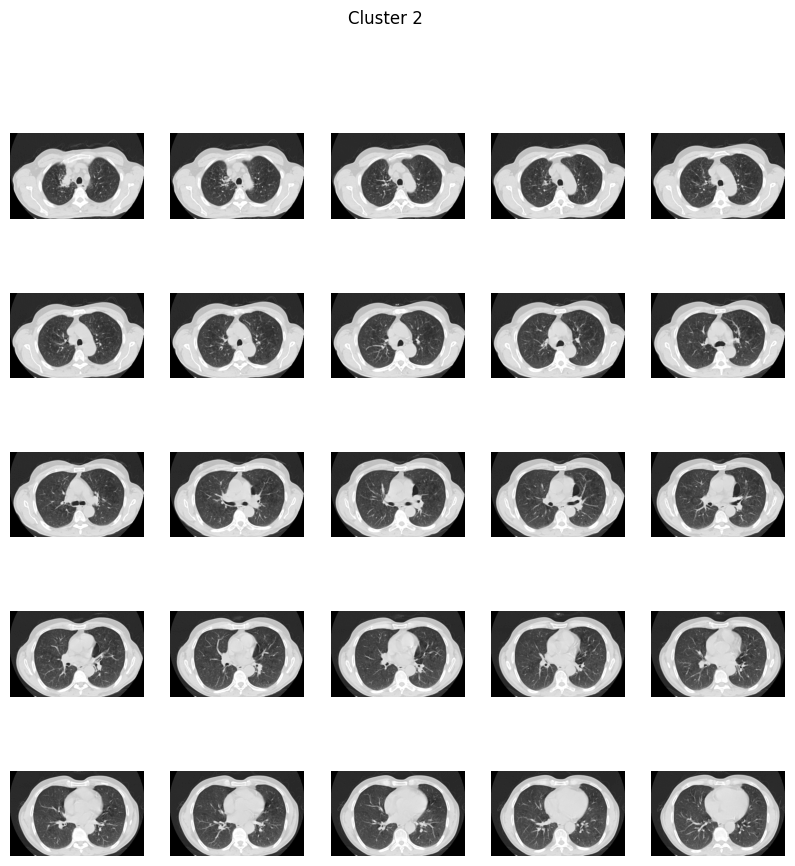

In [20]:
# Áp dụng DBSCAN
eps = 1000  
min_samples = 15
labels = dbscan(processed_images, eps, min_samples)


unique_labels = np.unique(labels)
label_map = {label: i for i, label in enumerate(unique_labels)}
mapped_labels = np.array([label_map[label] for label in labels])

# Evaluate clustering
accuracy = accuracy_score(true_labels_encoded, mapped_labels)
f1 = f1_score(true_labels_encoded, mapped_labels, average='weighted')
rand_index = rand_score(true_labels_encoded, mapped_labels)
homogeneity = homogeneity_score(true_labels_encoded, mapped_labels)
completeness = completeness_score(true_labels_encoded, mapped_labels)
silhouette_avg = silhouette_score(processed_images, mapped_labels)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Rand Index: {rand_index}')
print(f'Homogeneity Score: {homogeneity}')
print(f'Completeness Score: {completeness}')
print(f'Silhouette Score: {silhouette_avg}')

# Display clusters
display_clusters(original_images, mapped_labels)

Dùng thư viện scikit-learn

DBSCAN Results:
Accuracy: 0.6666666666666666
F1 Score: 0.7777777777777778
Rand Index: 0.7619047619047619
Homogeneity Score: 1.0000000000000004
Completeness Score: 0.5793801642856952
Silhouette Score: 0.8413609483126862


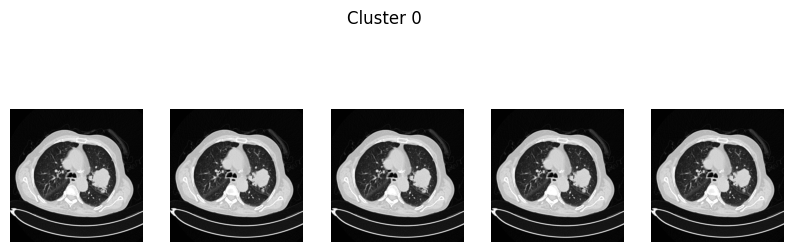

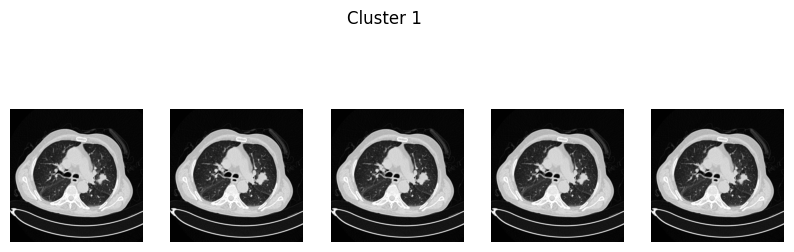

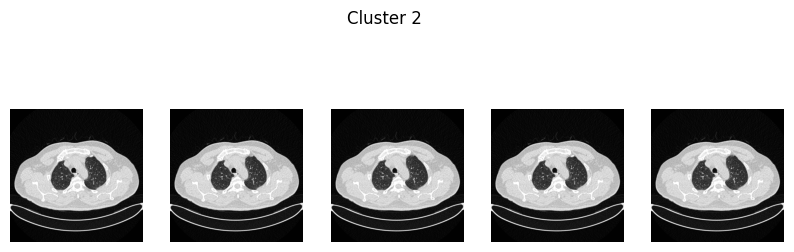

<Figure size 1000x1000 with 0 Axes>

In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=900, min_samples=5)  
predicted_labels_dbscan = dbscan.fit_predict(processed_images)

# Filter out noise points (-1)
filtered_indices = np.where(predicted_labels_dbscan != -1)[0]
filtered_true_labels_encoded = true_labels_encoded[filtered_indices]
filtered_predicted_labels_dbscan = predicted_labels_dbscan[filtered_indices]
filtered_processed_images = processed_images[filtered_indices]

# Evaluate DBSCAN clustering
accuracy_dbscan = accuracy_score(filtered_true_labels_encoded, filtered_predicted_labels_dbscan)
f1_dbscan = f1_score(filtered_true_labels_encoded, filtered_predicted_labels_dbscan, average='weighted')
rand_index_dbscan = rand_score(filtered_true_labels_encoded, filtered_predicted_labels_dbscan)
homogeneity_dbscan = homogeneity_score(filtered_true_labels_encoded, filtered_predicted_labels_dbscan)
completeness_dbscan = completeness_score(filtered_true_labels_encoded, filtered_predicted_labels_dbscan)
silhouette_avg_dbscan = silhouette_score(filtered_processed_images, filtered_predicted_labels_dbscan)

print(f'DBSCAN Results:')
print(f'Accuracy: {accuracy_dbscan}')
print(f'F1 Score: {f1_dbscan}')
print(f'Rand Index: {rand_index_dbscan}')
print(f'Homogeneity Score: {homogeneity_dbscan}')
print(f'Completeness Score: {completeness_dbscan}')
print(f'Silhouette Score: {silhouette_avg_dbscan}')

# Display DBSCAN clusters
display_clusters(original_images, predicted_labels_dbscan)


Accuracy: 0.9545454545454546
F1 Score: 0.9557585450724387
Rand Index: 0.9456205894562059
Homogeneity Score: 0.8293904180697744
Completeness Score: 0.8030310589165828
Silhouette Score: -0.03410577592770606


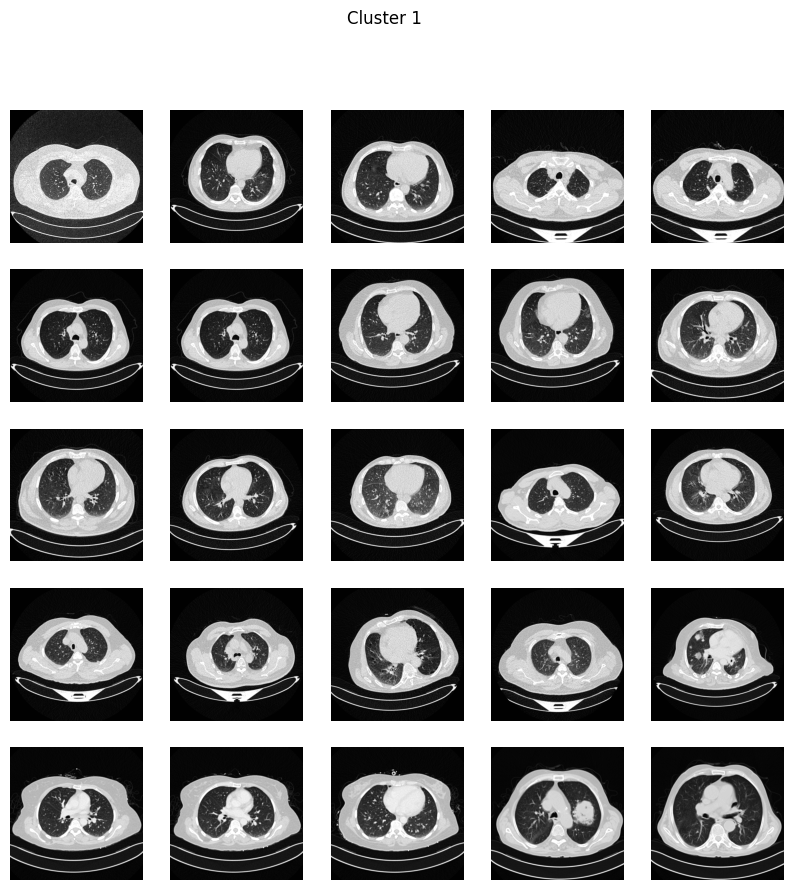

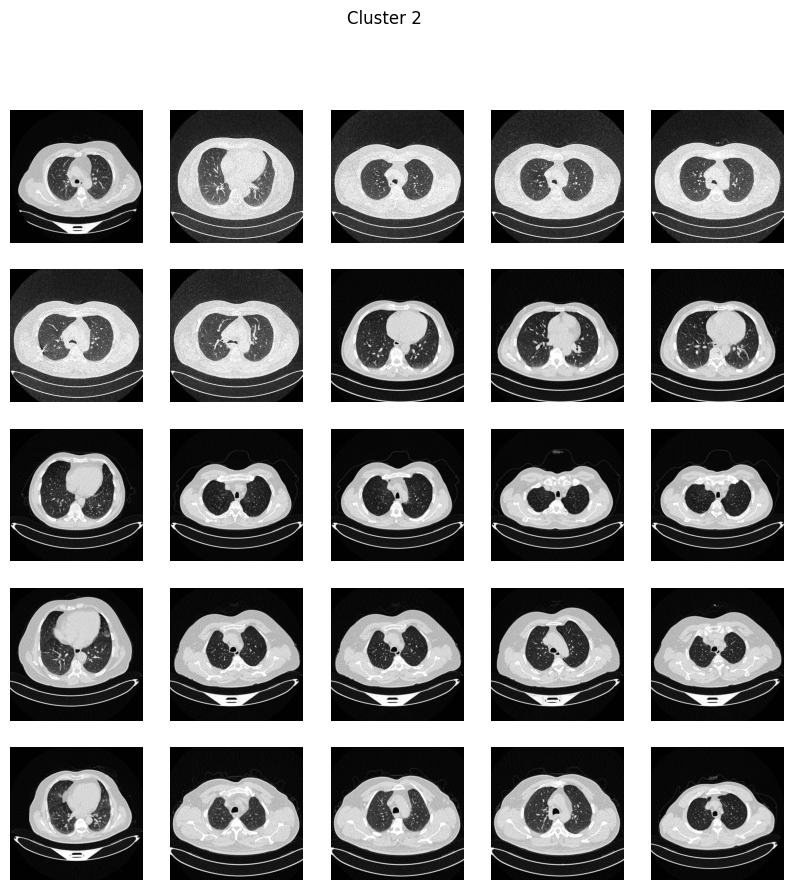

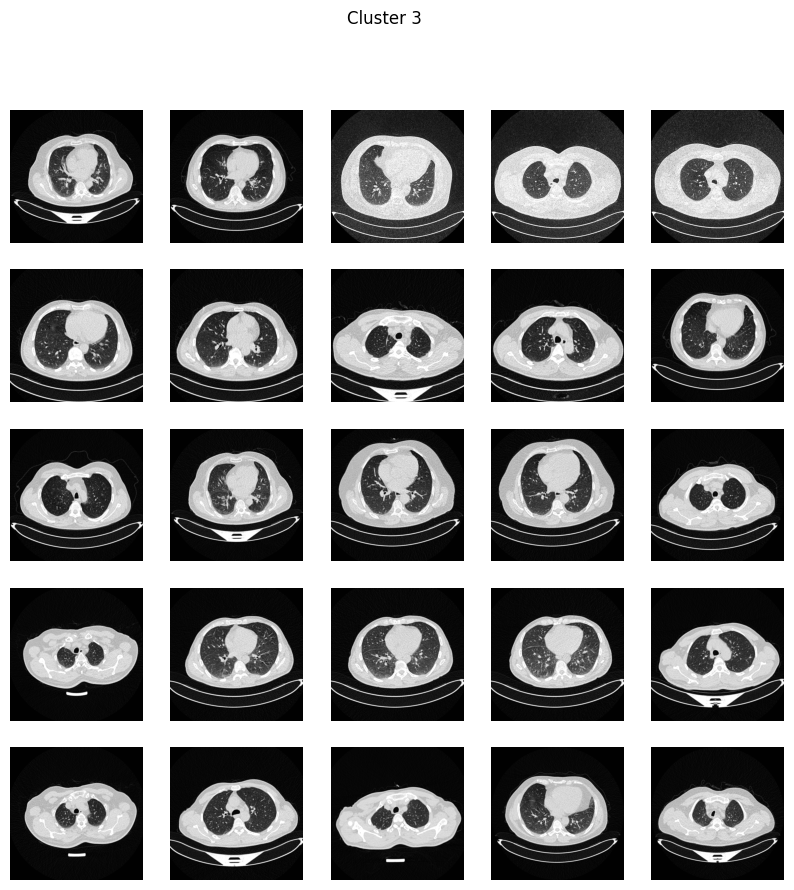

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def extract_grid_features(img, grid_size=8):
    h, w = img.shape
    grid_h, grid_w = h // grid_size, w // grid_size
    features = []
    for i in range(grid_size):
        for j in range(grid_size):
            grid = img[i*grid_h:(i+1)*grid_h, j*grid_w:(j+1)*grid_w]
            features.append(np.mean(grid))
            features.append(np.std(grid))
    return features

def extract_features_from_images(images):
    features = []
    for img in images:
        features.append(extract_grid_features(img))
    return np.array(features)

# Extract grid-based features
X = extract_features_from_images([cv2.resize(img, (128, 128)) for img in all_images])

X_train, X_test, y_train, y_test = train_test_split(X, true_labels_encoded, test_size=0.2, random_state=42, stratify=true_labels_encoded)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
rand_index = rand_score(y_test, y_pred)
homogeneity = homogeneity_score(y_test, y_pred)
completeness = completeness_score(y_test, y_pred)
silhouette_avg = silhouette_score(X_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Rand Index: {rand_index}')
print(f'Homogeneity Score: {homogeneity}')
print(f'Completeness Score: {completeness}')
print(f'Silhouette Score: {silhouette_avg}')

# Display clusters (for comparison purposes)
def display_clusters_grid(original_images, y_pred, true_labels):
    for cluster_idx in np.unique(y_pred):
        plt.figure(figsize=(10, 10))
        cluster_indices = np.where(y_pred == cluster_idx)[0]
        cluster_images = [original_images[i] for i in cluster_indices]
        for i, img in enumerate(cluster_images[:25]):
            plt.subplot(5, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Cluster {cluster_idx + 1}')
        plt.show()

display_clusters_grid(all_images, y_pred, true_labels)
